# EDA
This is the first step prior bulding a machine learining model. The mission of this part is to: 
1. Investigate the categorical features and come with a plan of how to deal with them
2. Investigate the NA values in each column and come with a plan of how to deal with them 
3. Outliers detection identify the abnoraml cases and eliminate there effect

In [5]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple

%matplotlib inline

In [7]:
rawdata.head()

,ID,ActiveDate,Seniority,FTDdate,FTDA,Region,Country,Channel,FirstInstrument,V3_Complete,...,pred_moving_ave_NewTrades_Total,pred_moving_ave_Revenue_Copy,pred_moving_ave_Revenue_Real_Stocks,pred_moving_ave_Revenue_CFD_Stocks,pred_moving_ave_Revenue_Real_Crypto,pred_moving_ave_Revenue_CFD_Crypto,pred_moving_ave_Revenue_FX/Comm/Ind,pred_moving_ave_Revenue_Total,ActiveDate_diff_LastPosOpenDate,ActiveDate_diff_LastLoggedIn
0,0000FD14-7FA7-EA11-A2D7-0017A4770404,2020-06-30,0.0,2020-06-06,400.0,Arabic GCC,United Arab Emirates,Mobile Acquisition,Alteneiji80,1.0,...,386.000000,13.0700,0.040000,1.730000,0.0,1.140000,60.540000,76.5200,0.0,6.0
1,0000FD14-7FA7-EA11-A2D7-0017A4770404,2020-07-31,1.0,2020-06-06,400.0,Arabic GCC,United Arab Emirates,Mobile Acquisition,Alteneiji80,1.0,...,221.000000,6.9750,0.500000,2.570000,0.0,3.170000,302.605000,315.8200,0.0,0.0
2,0000FD14-7FA7-EA11-A2D7-0017A4770404,2020-08-31,2.0,2020-06-06,400.0,Arabic GCC,United Arab Emirates,Mobile Acquisition,Alteneiji80,1.0,...,164.333333,4.6500,1.456667,16.456667,0.0,2.113333,1403.813333,1428.4900,4.0,0.0
3,0000FD14-7FA7-EA11-A2D7-0017A4770404,2020-09-30,3.0,2020-06-06,400.0,Arabic GCC,United Arab Emirates,Mobile Acquisition,Alteneiji80,1.0,...,130.000000,3.4875,1.092500,12.342500,0.0,62.327500,1263.520000,1342.7700,1.0,1.0
4,0000FD14-7FA7-EA11-A2D7-0017A4770404,2020-10-31,4.0,2020-06-06,400.0,Arabic GCC,United Arab Emirates,Mobile Acquisition,Alteneiji80,1.0,...,41.000000,0.2200,1.082500,11.910000,0.0,172.310000,1507.385000,1692.9075,4.0,4.0


In [6]:
# read the data
rawdata = pd.read_parquet("gs://churn_prediction_inputs/rawdata/curn_prediction_processed.parquet")
rawdata.dropna(axis=0, how="all", inplace=True)

USER_ID_COL = 'ID'
DATE_COL = 'ActiveDate'
TARGET_COL = 'target'

<AxesSubplot:title={'center':'The churn rate with relation to time'}, xlabel='ActiveDate'>

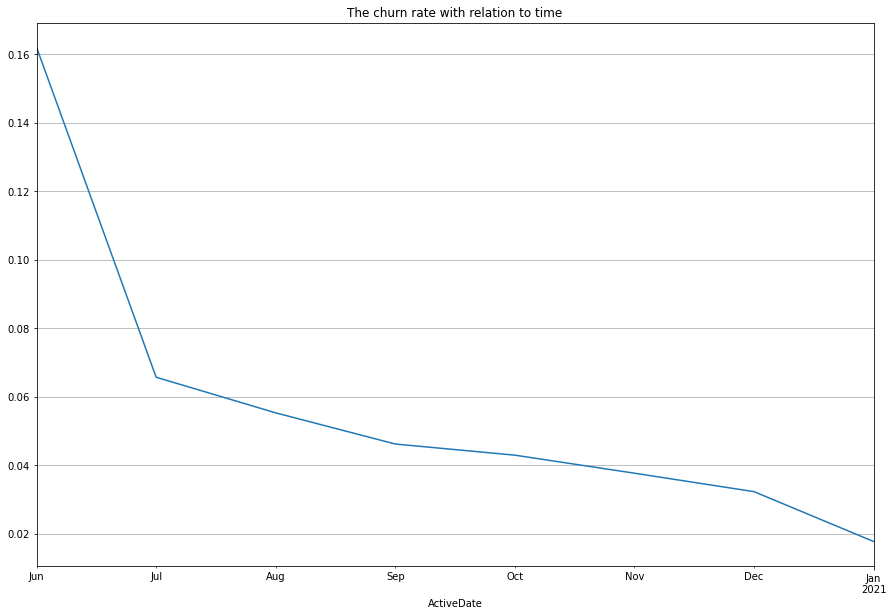

In [93]:
aggs = {
    'target': ['sum', 'size']
}
churn_rate = rawdata.groupby(DATE_COL)[TARGET_COL].apply(lambda users: sum(users)/len(users)).sort_index()
churn_rate.plot(
    kind='line',
    figsize=(15, 10),
    grid=True,
    title='The churn rate with relation to time'
)

<AxesSubplot:title={'center':'The amount of monet invested in relation to the instrument type'}>

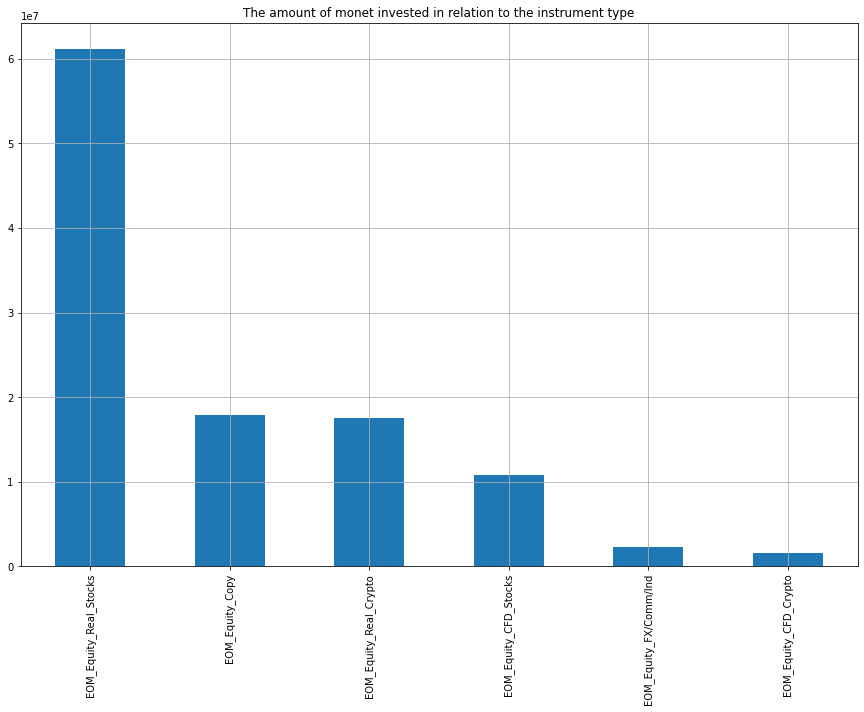

In [94]:
snapshot_data = rawdata[rawdata[DATE_COL]==max(rawdata[DATE_COL])]

types_of_investments = [
    'EOM_Equity_Copy',
    'EOM_Equity_Real_Crypto',
    'EOM_Equity_Real_Stocks',
    'EOM_Equity_CFD_Crypto',
    'EOM_Equity_CFD_Stocks',
    'EOM_Equity_FX/Comm/Ind'
]

snapshot_data[types_of_investments].sum(axis=0).sort_values(ascending=False).plot(
    kind='bar',
    figsize=(15, 10),
    grid=True,
    title='The amount of monet invested in relation to the instrument type'
)

<AxesSubplot:title={'center':'The average holdigns by instrument type'}>

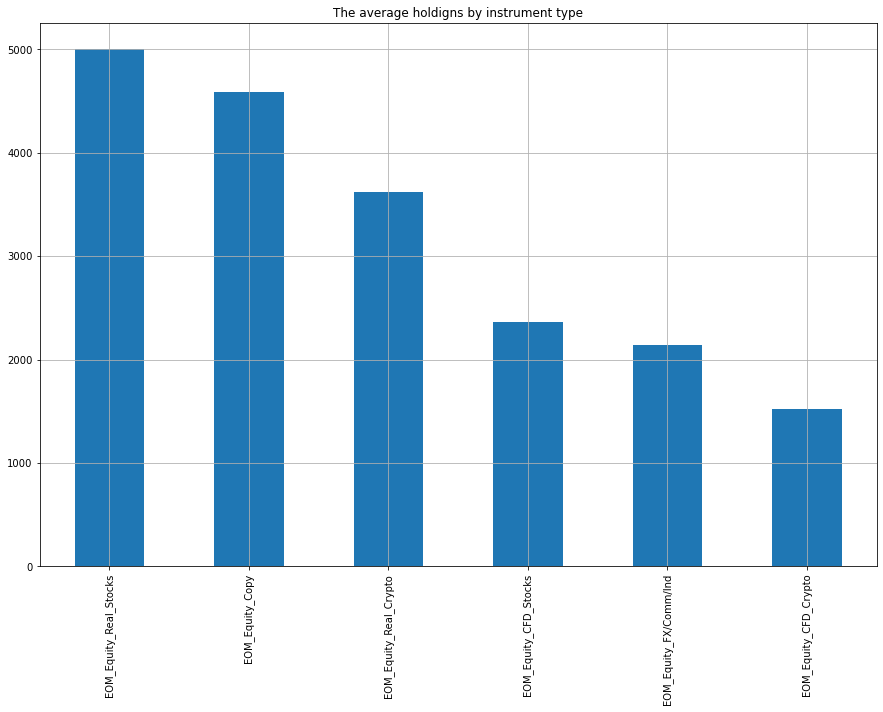

In [95]:
snapshot_data[types_of_investments].replace({0:None}).mean(axis=0, skipna=True).sort_values(ascending=False).plot(
    kind='bar',
    figsize=(15, 10),
    grid=True,
    title='The average holdigns by instrument type'
)



<AxesSubplot:title={'center':'The number of useres by country'}>

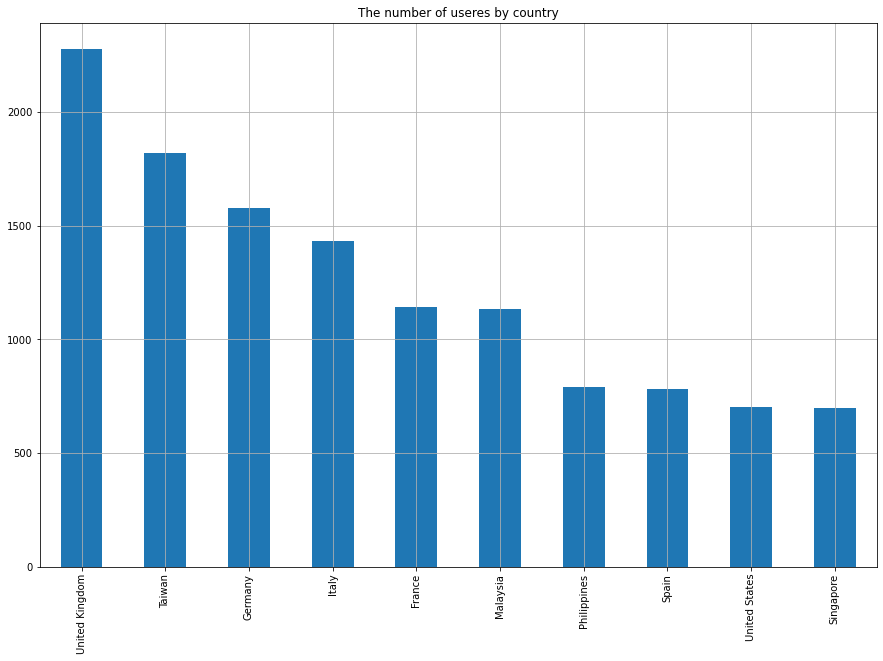

In [96]:
snapshot_data.Country.value_counts()[:10].plot(
    kind='bar',
    figsize=(15, 10),
    grid=True,
    title='The number of useres by country'
)


In [74]:
snapshot_data.head()


,ID,ActiveDate,Seniority,FTDdate,FTDA,Region,Country,Channel,FirstInstrument,V3_Complete,...,pred_moving_ave_NewTrades_Total,pred_moving_ave_Revenue_Copy,pred_moving_ave_Revenue_Real_Stocks,pred_moving_ave_Revenue_CFD_Stocks,pred_moving_ave_Revenue_Real_Crypto,pred_moving_ave_Revenue_CFD_Crypto,pred_moving_ave_Revenue_FX/Comm/Ind,pred_moving_ave_Revenue_Total,ActiveDate_diff_LastPosOpenDate,ActiveDate_diff_LastLoggedIn
7,0000FD14-7FA7-EA11-A2D7-0017A4770404,2021-01-31,7.0,2020-06-06,400.00,Arabic GCC,United Arab Emirates,Mobile Acquisition,Alteneiji80,1.0,...,12.50,0.0000,107.7075,0.0000,287.3625,139.9625,259.000,794.0325,1.0,1.0
15,0001A103-AAA5-EA11-A2D7-0017A4770404,2021-01-31,7.0,2020-04-06,206.88,UK,United Kingdom,Mobile Acquisition,AF.PA/EUR,1.0,...,3.00,0.0000,11.9400,0.2725,0.0000,0.0000,0.000,12.2125,3.0,2.0
35,001D4768-3EB7-EA11-A2D7-0017A4770404,2021-01-31,7.0,2020-06-26,200.00,South & Central America,Dominican Republic,SEM,KO/USD,1.0,...,3.00,0.0000,5.1975,0.0000,0.0000,11.8225,0.000,17.0200,-60.0,3.0
43,001F06F5-43AB-E911-A2D2-0017A4770404,2021-01-31,7.0,2020-06-26,300.00,North Europe,Norway,SEM,MSFT/USD,1.0,...,338.75,2.7525,9.2225,1.1875,18.5300,1.8550,8.015,41.5625,2.0,3.0
51,00224911-C4BA-EA11-A2D7-0017A4770404,2021-01-31,7.0,2020-06-30,2211.60,German,Germany,Direct,WYNN/USD,1.0,...,0.25,0.0000,-0.0975,1.4350,0.0000,0.0000,0.000,1.3375,34.0,4.0


In [69]:
def columns_convert_object_to_date(rawdata:pd.DataFrame, date_columns: List[str]):
    """
    This function convert dates from object type to date type column inplae
    """
    for date_column in date_columns:
        rawdata[date_column] = pd.to_datetime(rawdata[date_column])
    
    return rawdata

def categorical_feature_occurences_bar_plot(categorical_series: pd.Series, category_feature_name: str, 
                                 threshold: int = 20, figsize: Tuple[int, int] = (12,8), as_ratio: bool = True):
    """
    This function plot each category number of occurences. If the number of categories
    is mode than the threshold than it will display the N hihest values in the series
    """
    categorical_occurences = categorical_series.value_counts()[:threshold]
    
    if as_ratio:
        categorical_occurences = categorical_occurences/categorical_series.count()
    
    categorical_occurences.plot(
        kind='bar', figsize=figsize, title=f'{category_feature_name} distribution of occurences'
    )
    
    
def display_categorical_feature_stats(rawdata: pd.DataFrame, categorical_features: List[str] = []):
    """
    This function prints and plot the provided categorical features important stats. If 
    a list of categorical features didnt deliver, all the object columns in the df will
    be treated as categorical features
    """
    categorical_df = rawdata[categorical_features]
        
    for category in categorical_df:
        print(categorical_df[category].describe())
        categorical_feature_occurences_bar_plot(categorical_df[category], category)
        plt.show()

In [70]:
# preprocess data
date_columns = ['ActiveDate', 'FTDdate', 'LastPosOpenDate', 'LastLoggedIn']
categorical_features = ['Country', 'Channel', 'FirstInstrument']

rawdata = columns_convert_object_to_date(rawdata, date_columns)

count             170646
unique               136
top       United Kingdom
freq               19525
Name: Country, dtype: object


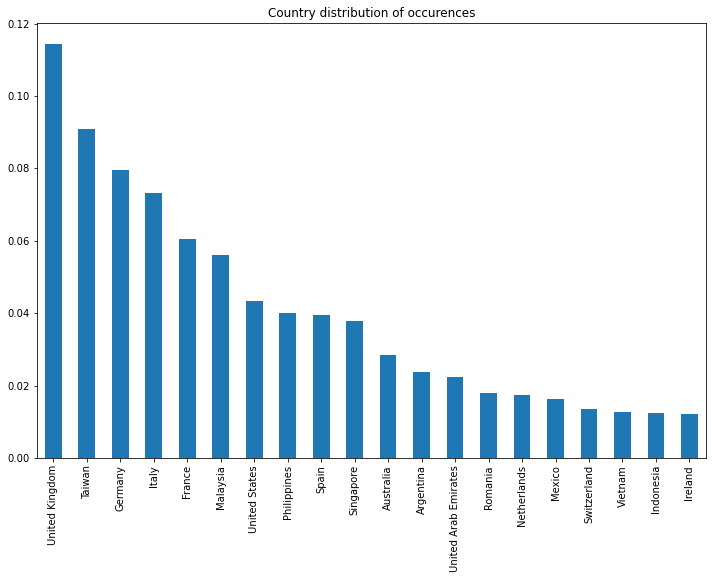

count     170646
unique        10
top       Direct
freq       47012
Name: Channel, dtype: object


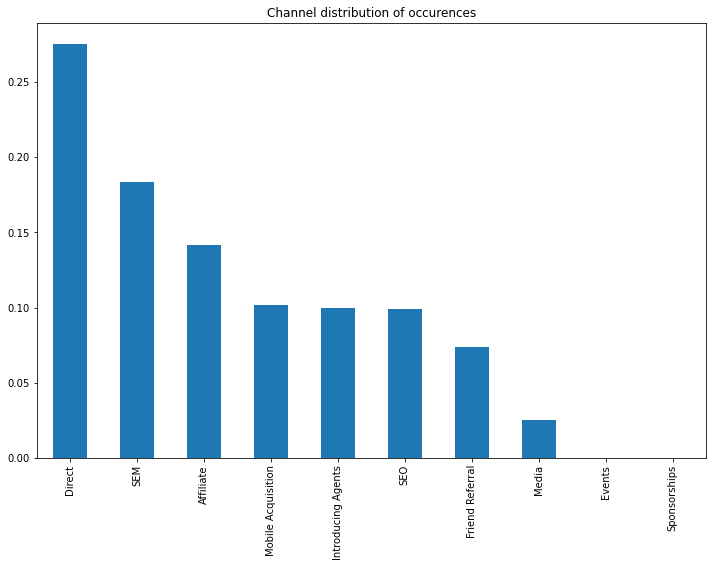

count      165948
unique       1674
top       BTC/USD
freq        11369
Name: FirstInstrument, dtype: object


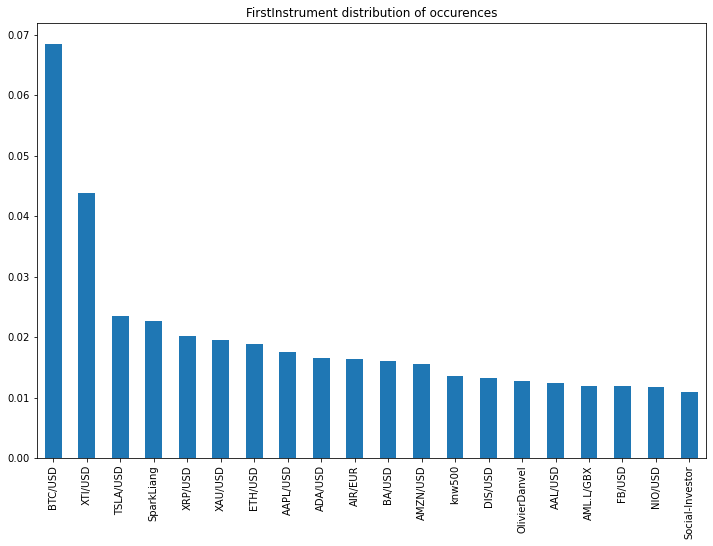

In [71]:
display_categorical_feature_stats(rawdata, categorical_features)